In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv('fashion-mnist_train.csv')


In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(60000, 785)

In [5]:
x=train_df.iloc[:,1:].values
y=train_df.iloc[:,0].values

In [6]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

# Visualizing the Images

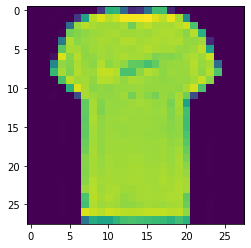

In [8]:
plt.imshow(x[10,:].reshape(28,28))

5

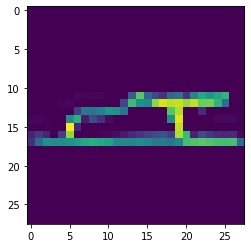

In [9]:
import random
i=random.randint(0,60000)
plt.imshow(x[i,:].reshape(28,28))
label=y[i]
label

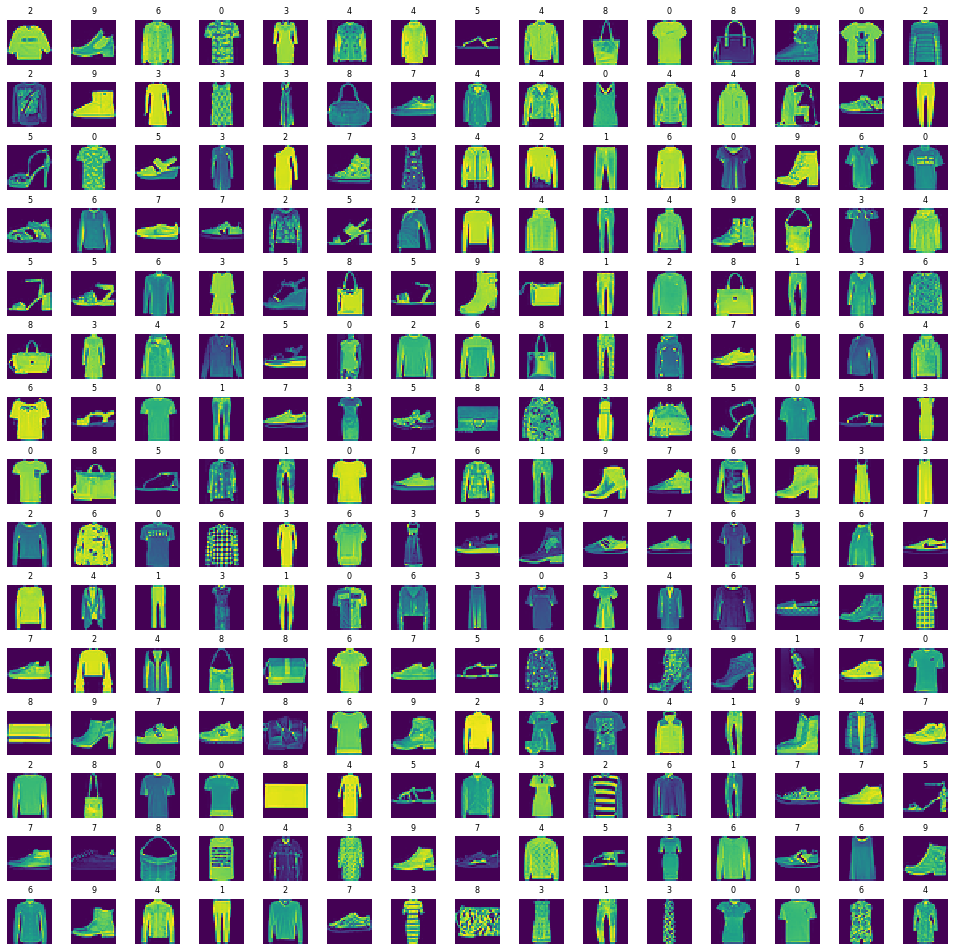

In [10]:
# Let's view more images in a grid format
w_grid=15
l_grid=15
fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel() #flattening the 15x15 matrix into 225 array
n_training=len(train_df)
for i in np.arange(0,w_grid*l_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x[i,:].reshape((28,28)))
    axes[i].set_title(y[i],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Building the CNN

In [11]:
x=x/255  #feature scaling each pixel value

In [12]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
y

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate=train_test_split(x,y,test_size=0.2,random_state=12345)

In [15]:
x_train.shape

(48000, 784)

In [16]:
x_validate.shape

(12000, 784)

In [17]:
y_train.shape

(48000,)

In [18]:
y_validate.shape

(12000,)

In [19]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [20]:
x_train.shape

(48000, 28, 28, 1)

In [21]:
x_validate.shape

(12000, 28, 28, 1)

In [22]:
# Lets build our CNN now
import tensorflow as tf

In [23]:
cnn=tf.keras.models.Sequential()

In [24]:
#step1: convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[28,28,1]))

In [25]:
#step2: max pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

In [27]:
#step3: flattening
cnn.add(tf.keras.layers.Flatten())

In [28]:
#step4: full connection..hidden layer
cnn.add(tf.keras.layers.Dense(units=32,activation='relu'))
# or cnn.add(tf.keras.layers.Dense(output_dim=32,activation='relu'))


In [29]:
#step5: output layer
cnn.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))
# or cnn.add(tf.keras.layers.Dense(output_dim=10,activation='sigmoid'))

# Training the CNN

In [30]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.fit(x_train,y_train,validation_data=(x_validate,y_validate),epochs=50,batch_size=512,verbose=1)

Epoch 1/50
94/94 [==============================] - 17s 184ms/step - loss: 1.1605 - accuracy: 0.6051 - val_loss: 0.6594 - val_accuracy: 0.7534
Epoch 2/50
94/94 [==============================] - 17s 177ms/step - loss: 0.5808 - accuracy: 0.7849 - val_loss: 0.5391 - val_accuracy: 0.7993
Epoch 3/50
94/94 [==============================] - 16s 175ms/step - loss: 0.5013 - accuracy: 0.8157 - val_loss: 0.4691 - val_accuracy: 0.8276
Epoch 4/50
94/94 [==============================] - 16s 171ms/step - loss: 0.4519 - accuracy: 0.8372 - val_loss: 0.4424 - val_accuracy: 0.8376
Epoch 5/50
94/94 [==============================] - 17s 176ms/step - loss: 0.4220 - accuracy: 0.8490 - val_loss: 0.4062 - val_accuracy: 0.8558
Epoch 6/50
94/94 [==============================] - 17s 178ms/step - loss: 0.3970 - accuracy: 0.8590 - val_loss: 0.4033 - val_accuracy: 0.8533
Epoch 7/50
94/94 [==============================] - 17s 176ms/step - loss: 0.3922 - accuracy: 0.8589 - val_loss: 0.3801 - val_accuracy: 0.8634

# Evaluating the Model

In [32]:
test_df=pd.read_csv('fashion-mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_df.shape

(10000, 785)

In [34]:
x_test=test_df.iloc[:,1:].values
y_test=test_df.iloc[:,0].values

In [35]:
x_test.shape

(10000, 784)

In [36]:
x_test=x_test/255

In [37]:
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))

In [38]:
evaluation=cnn.evaluate(x_test,y_test)
print('Test Accuracy is : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2549 - accuracy: 0.9077
Test Accuracy is : 0.908


In [39]:
y_pred=cnn.predict_classes(x_test)
print(y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0 1 6 ... 8 8 2]


WARNING:tensorflow:From <ipython-input-79-a341a4b6c88d>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[862   0  20  26   2   2  80   0   8   0]
 [  2 971   3  18   1   1   3   0   1   0]
 [  8   1 857  20  57   0  51   0   6   0]
 [  9   5   7 950  12   1  15   0   1   0]
 [  0   1  50  30 864   1  53   0   1   0]
 [  0   1   0   0   0 972   0  17   3   7]
 [128   0  69  42  58   0 694   0   9   0]
 [  0   0   0   0   0  13   0 963   0  24]
 [  2   2   3   2   2   1   1   3 984   0]
 [  0   0   0   0   0   6   0  34   0 960]]


0.9077

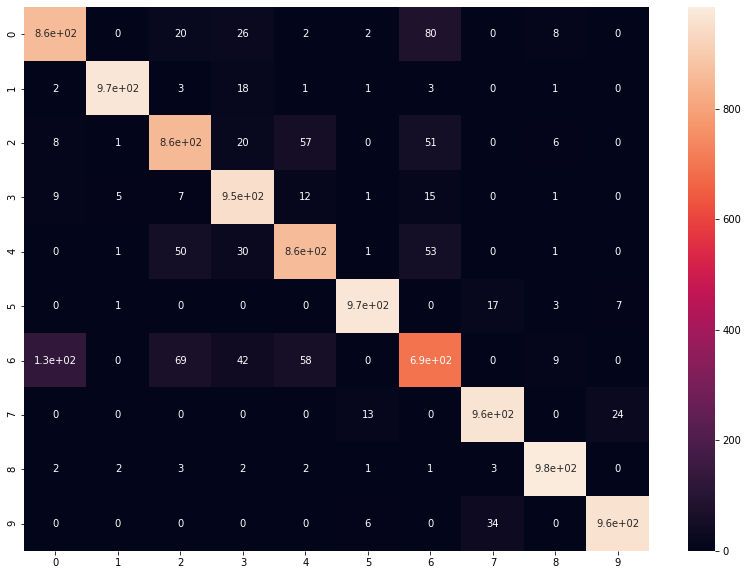

In [41]:
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [42]:
target_names=["Class {}".format(i) for i in range(0,10)]
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.86      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.85      0.86      0.85      1000
     Class 3       0.87      0.95      0.91      1000
     Class 4       0.87      0.86      0.87      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.77      0.69      0.73      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



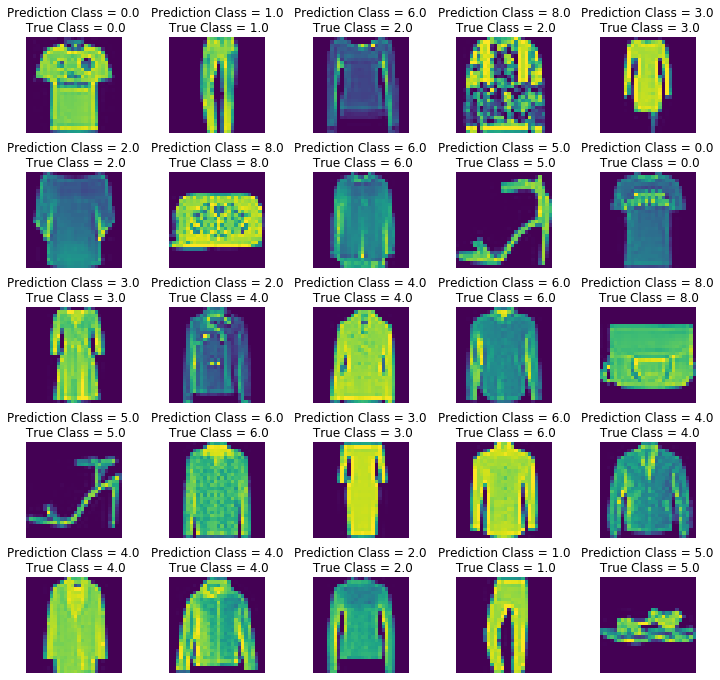

In [43]:
# Let's visualize our predictions
w_grid=5
l_grid=5
fig,axes=plt.subplots(l_grid,w_grid,figsize=(12,12))
axes=axes.ravel() #flattening the 15x15 matrix into 225 array
n_test=len(test_df)
for i in np.arange(0,w_grid*l_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_test[i,:].reshape((28,28)))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i],y_test[i],fontsize=8))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)